Random Seeding & Enable Determinism to produce replicable results

In [80]:
import tensorflow as tf
from tensorflow import keras

tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

Importing libraries and modules

In [81]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from keras import layers
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical

print(tf.__version__) 
# tf.random.set_seed(123)

2.15.0


Load Dataset

In [82]:
filename = "mocap dataset.csv"
filepath = f"/home/RUS_CIP/st179677/project/dataset/5 users/{filename}"

df = pd.read_csv(filepath)
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
df

,Pelvis_extension,Pelvis_lateral_flexion_rotation,Pelvis_axial_rotation,LeftHip_flexion,LeftHip_adduction,LeftHip_external_rotation,LeftKnee_flexion,LeftKnee_adduction,LeftKnee_external_rotation,LeftAnkle_dorsiflexion,...,RightScapula_posterior_tilt,RightShoulder_flexion,RightShoulder_abduction,RightShoulder_external_rotation,RightElbow_flexion,RightElbow_abduction,RightElbow_pronation,RightWrist_flexion,RightWrist_abduction,RightWrist_pronation
0,-9.046156,-2.043135,15.423850,16.315730,-2.176447,3.557985,-20.284060,0.002008,0.0,12.822370,...,-7.222870,-3.128814,-4.325992,-0.197741,6.993781,-2.687741,12.771290,6.443907,-6.364083,0.717370
1,-9.041094,-2.024045,15.294020,16.273570,-2.145615,3.535517,-20.223180,0.002035,0.0,12.763170,...,-7.266767,-3.341406,-4.194280,-0.005949,5.846905,-2.109600,12.207390,6.443938,-6.364090,0.717370
2,-9.036833,-2.017638,15.232000,16.245790,-2.136333,3.507773,-20.183570,0.002015,0.0,12.729040,...,-7.291833,-3.451562,-4.118608,0.078192,5.292946,-1.873890,11.996300,6.443938,-6.364083,0.717370
3,-9.027501,-2.013260,15.099430,16.181450,-2.133915,3.430795,-20.087540,0.001865,0.0,12.658100,...,-7.330745,-3.683339,-3.950271,0.236885,4.553975,-1.617327,11.806790,6.443938,-6.364083,0.717370
4,-9.025716,-2.009804,14.967540,16.124690,-2.125500,3.346148,-19.995180,0.001769,0.0,12.579530,...,-7.376345,-3.931587,-3.766344,0.415637,3.538838,-1.371222,11.803300,6.443907,-6.364090,0.717098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50744,-8.882502,-1.408453,-4.250266,7.732232,5.765028,-1.364727,0.000000,-0.000178,0.0,-3.379682,...,-8.575309,-10.832440,3.651787,10.399640,6.520080,-5.493917,-0.302612,6.443938,-6.364090,0.717370
50745,-9.176225,-1.344468,-3.955720,7.645190,5.682390,-1.322490,-0.044235,-0.000164,0.0,-2.883508,...,-8.753312,-11.274260,3.605326,10.580370,6.830098,-5.919752,-0.169020,6.443938,-6.364097,0.717370
50746,-9.310635,-1.303828,-3.863307,7.586411,5.642023,-1.282832,-0.044235,-0.000184,0.0,-2.650036,...,-8.852416,-11.432010,3.534685,10.652270,6.867785,-6.101278,-0.039565,6.443938,-6.364097,0.717098
50747,-9.521404,-1.178317,-3.701105,7.405150,5.607660,-1.134532,0.000000,-0.000164,0.0,-2.223960,...,-9.039616,-11.598260,3.334719,10.819220,6.764049,-6.280038,-0.019782,6.443938,-6.364090,0.717370


In [83]:
features = ["Neck_flexion", "Neck_left-ward_tilt", "Neck_right-ward_rotation", "LeftElbow_flexion", "RightElbow_flexion", "LeftKnee_flexion", "RightKnee_flexion", "Thorax_extension", "Thorax_lateral_flexion_rotation"]

In [84]:
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df),columns = df.columns, index=df.index)

df

# scaler = MinMaxScaler()
# # scaler = scaler.fit(df)

# df = scaler.fit_transform(df)
# df

,Pelvis_extension,Pelvis_lateral_flexion_rotation,Pelvis_axial_rotation,LeftHip_flexion,LeftHip_adduction,LeftHip_external_rotation,LeftKnee_flexion,LeftKnee_adduction,LeftKnee_external_rotation,LeftAnkle_dorsiflexion,...,RightScapula_posterior_tilt,RightShoulder_flexion,RightShoulder_abduction,RightShoulder_external_rotation,RightElbow_flexion,RightElbow_abduction,RightElbow_pronation,RightWrist_flexion,RightWrist_abduction,RightWrist_pronation
0,0.172087,-0.207232,0.364331,-0.274085,-0.498892,-0.069644,0.087011,0.213347,-0.279302,0.356127,...,-0.288476,-0.313392,-0.802117,-0.501679,-0.741033,0.629271,0.104565,-1.547006,0.389370,0.981156
1,0.172448,-0.204364,0.362312,-0.275800,-0.496053,-0.070954,0.089203,0.213939,-0.279302,0.350253,...,-0.299686,-0.323521,-0.793412,-0.484598,-0.771593,0.656903,0.080311,-0.083025,-0.152356,0.981156
2,0.172752,-0.203402,0.361348,-0.276930,-0.495198,-0.072570,0.090629,0.213495,-0.279302,0.346867,...,-0.306087,-0.328769,-0.788411,-0.477105,-0.786354,0.668169,0.071232,-0.083025,0.389370,0.981156
3,0.173418,-0.202744,0.359286,-0.279546,-0.494976,-0.077057,0.094088,0.210238,-0.279302,0.339828,...,-0.316023,-0.339812,-0.777286,-0.462972,-0.806045,0.680431,0.063080,-0.083025,0.389370,0.981156
4,0.173546,-0.202225,0.357235,-0.281854,-0.494201,-0.081990,0.097414,0.208166,-0.279302,0.332032,...,-0.327668,-0.351639,-0.765131,-0.447053,-0.833095,0.692194,0.062930,-1.547006,-0.152356,-0.413838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50744,0.183769,-0.111898,0.058397,-0.623143,0.232443,-0.356542,0.817460,0.165974,-0.279302,-1.251446,...,-0.633842,-0.680420,-0.274880,0.442092,-0.753656,0.495151,-0.457767,-0.083025,-0.152356,0.981156
50745,0.162802,-0.102287,0.062978,-0.626682,0.224833,-0.354081,0.815867,0.166270,-0.279302,-1.202216,...,-0.679298,-0.701470,-0.277950,0.458187,-0.745395,0.474799,-0.452021,-0.083025,-0.694082,0.981156
50746,0.153207,-0.096183,0.064415,-0.629073,0.221115,-0.351769,0.815867,0.165826,-0.279302,-1.179051,...,-0.704606,-0.708986,-0.282619,0.464590,-0.744391,0.466123,-0.446453,-0.083025,-0.694082,-0.413838
50747,0.138161,-0.077330,0.066937,-0.636444,0.217951,-0.343126,0.817460,0.166270,-0.279302,-1.136775,...,-0.752411,-0.716907,-0.295834,0.479458,-0.747155,0.457579,-0.445602,-0.083025,-0.152356,0.981156


In [85]:
filename = "mocap dataset.csv"
filepath = f"/home/RUS_CIP/st179677/project/dataset/5 users/{filename}"

df = pd.read_csv(filepath)
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)



df = df[features]
df

,Neck_flexion,Neck_left-ward_tilt,Neck_right-ward_rotation,LeftElbow_flexion,RightElbow_flexion,LeftKnee_flexion,RightKnee_flexion,Thorax_extension,Thorax_lateral_flexion_rotation
0,6.532609,3.413257,-9.364980,2.198468,6.993781,-20.284060,0.000000,3.393499,5.001980
1,6.557388,3.534179,-9.039681,1.893722,5.846905,-20.223180,-0.048457,3.442418,4.944012
2,6.557417,3.569129,-8.875886,1.806886,5.292946,-20.183570,0.000000,3.458419,4.921090
3,6.584455,3.591450,-8.561050,1.691654,4.553975,-20.087540,-0.068528,3.467804,4.882923
4,6.645496,3.591949,-8.246242,1.641156,3.538838,-19.995180,0.000000,3.469554,4.849421
...,...,...,...,...,...,...,...,...,...
50744,-16.670490,0.316716,-5.353024,15.269830,6.520080,0.000000,-17.106140,6.845329,-1.817957
50745,-14.910760,0.640351,-6.052200,14.761030,6.830098,-0.044235,-16.247700,6.842291,-1.589802
50746,-14.163410,0.802677,-6.308852,14.491450,6.867785,-0.044235,-15.807290,6.873380,-1.477548
50747,-12.880330,1.093821,-6.555832,13.773880,6.764049,0.000000,-14.789060,6.955138,-1.295967


Plotting Distribution of Classes

In [86]:
labels_filename = "labels.xlsx"
labels_filepath = f"/home/RUS_CIP/st179677/project/dataset/5 users/{labels_filename}"
labels_df = pd.read_excel(labels_filepath)
print(labels_df)

# # Sort the labels for better visualization
# sorted_labels = label_counts.index.sort_values()

# # Plot the distribution
# plt.bar(sorted_labels, label_counts[sorted_labels])
# plt.xlabel('Class Labels')
# plt.ylabel('Frequency')
# plt.title('Distribution of Class Labels')
# plt.show()

       labels
0           0
1           0
2           0
3           0
4           0
...       ...
50744       4
50745       4
50746       4
50747       4
50748       4

[50749 rows x 1 columns]


In [87]:
# Create 51 empty lists with names X0 to X50
X0, X1, X2, X3, X4, X5, X6, X7, X8, y = ([] for _ in range(10))
# X, y = [[] for _ in range(51)], []

# # Print the lists for verification
# for i, X_list in enumerate([X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, y]):
#     print(f"{X_list=}")


Create Sequences from Dataset

In [88]:
timesteps = 70

# Iterate over the range of rows in df
for i in range(0, df.shape[0] - timesteps):
    for j in range(9):  # Loop for column indexing
        globals()[f'X{j}'].append(df.iloc[i:i + timesteps, j])

# Iterate over the range of rows in labels_df
for i in range(0, labels_df.shape[0] - timesteps):
     y.append(labels_df.iloc[i + timesteps, 0])

In [89]:
type(y)

list

In [90]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [91]:
X0, X1, X2, X3, X4, X5, X6, X7,X8, y = np.array(X0), np.array(X1),  np.array(X2),  np.array(X3),  np.array(X4),  np.array(X5),  np.array(X6),  np.array(X7), np.array(X8), np.array(y)

In [92]:
X0.shape

(50679, 70)

In [93]:
X0

array([[  6.532609,   6.557388,   6.557417, ...,  10.32924 ,  10.32356 ,
         10.28637 ],
       [  6.557388,   6.557417,   6.584455, ...,  10.32356 ,  10.28637 ,
         10.23253 ],
       [  6.557417,   6.584455,   6.645496, ...,  10.28637 ,  10.23253 ,
         10.18343 ],
       ...,
       [-48.97389 , -49.35594 , -49.49738 , ..., -18.60934 , -16.67049 ,
        -14.91076 ],
       [-49.35594 , -49.49738 , -49.50583 , ..., -16.67049 , -14.91076 ,
        -14.16341 ],
       [-49.49738 , -49.50583 , -49.5913  , ..., -14.91076 , -14.16341 ,
        -12.88033 ]])

In [94]:
X = np.stack([X0, X1, X2, X3, X4, X5, X6, X7, X8], axis=2)

In [95]:
X.shape

(50679, 70, 9)

In [96]:
y.shape

(50679,)

In [97]:
# convert labels to one hot encoded

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

# encode integers to one hot encoded values
Y = to_categorical(encoded_Y)
print(Y)
print(Y.shape)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
(50679, 5)


In [98]:
#splitting dataset into train, test and validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

print("X train :",X_train.shape)
print("y train:", y_train.shape)
print("X test :", X_test.shape)
print("y test :" ,y_test.shape)
print("X val :" ,X_val.shape)
print("y val :" ,y_val.shape)

# print(X_train)
# print(X_test)
# print(y_train) 
# print(y_val)



X train : (32434, 70, 9)
y train: (32434, 5)
X test : (10136, 70, 9)
y test : (10136, 5)
X val : (8109, 70, 9)
y val : (8109, 5)


In [99]:
#Transformer Encoder Model

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [100]:
# # Transformer Encoder Block
# def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
#     # Normalization and Attention
#     x = layers.LayerNormalization(epsilon=1e-6)(inputs)
#     x = layers.MultiHeadAttention(
#         key_dim=head_size, num_heads=num_heads, dropout=dropout
#     )(x, x)
#     x = layers.Dropout(dropout)(x)
#     res = x + inputs

#     # Feed Forward Part
#     x = layers.LayerNormalization(epsilon=1e-6)(res)
#     x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
#     x = layers.Dropout(dropout)(x)
#     x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
#     return x + res

In [101]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(5, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [102]:
# import keras_tuner as kt

# input_shape = (50,51)

# # Building the entire Transformer model with encoder block and classification block
# def build_model(hp):

#     '''
#     Building a vanilla transformer model with hyer-parameter to explore
#     Hyper-parameters to set:
#       1. emb_vector_size: Embedding Vector Dimensions,   Number of dimensions for the embedding positional vector
#       2. num_heads: Number of heads
#       3. ff_dim:  Hidden layer size in feed forward network inside transformer
#       4. num_transformer_blocks: Total number of encoder layers
#       5. num_mlp_layers: Number of mlp layers after the encoder layer
#       6. mlp_units: Number of units in the Dense networks
      
#     '''

#     # inputs = keras.Input(shape=MAX_LEN)
#     inputs = keras.Input(shape=input_shape)

#     # Hyper-parameters
#     # emb_vector_size = hp.Int('EVD', min_value=100, max_value=250, step=50)
#     num_heads = hp.Int('num_heads', min_value=4, max_value=6, step=1)
#     ff_dim = hp.Int('ff_dim', min_value=32, max_value=64, step=32)
#     num_transformer_blocks = hp.Int('num_transformer_blocks', min_value=2, max_value=4, step=1)

#     # Other Hyper-parameters to explore

#     num_mlp_layers = 1
#     mlp_units = hp.Int('ff_dim', min_value=32, max_value=64, step=32)


#     mlp_dropout = 0.4
#     dropout=0.25

#     # x = PositionalEmbedding(MAX_LEN, VOCAB_SIZE, emb_vector_size)(inputs) #inputs
    
    
#     for _ in range(num_transformer_blocks):
#         x = transformer_encoder(inputs, num_heads, ff_dim, dropout)

#     x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)

#     mlp_units=[128]
#     mlp_dropout = 0.4
#     for dim in range(num_mlp_layers):
#         x = layers.Dense(dim, activation="relu")(x)
#         x = layers.Dropout(mlp_dropout)(x)
#     outputs = layers.Dense(5, activation="softmax")(x)
#     transformer_model = keras.Model(inputs, outputs)
#     transformer_model.compile(loss='sparse_categorical_crossentropy',
#                    optimizer='adam',
#                    metrics=['accuracy', 
#                             ])
#     return transformer_model

# # Keras Tuner Stratergy 
# tuner = kt.GridSearch(build_model,
#                      objective='val_accuracy',
#                      seed=1,
#                      max_retries_per_trial=3,
#                      max_consecutive_failed_trials=5)

# # Early Stopping 
# ES = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',    
#                                       patience=4,    
#                                       verbose=1,    
#                                       restore_best_weights='True'
#                                      )

# # Run Keras Tuner
# tuner.search(X_train, y_train,
#              epochs=100, 
#              validation_data=(X_val, y_val),
#              callbacks=[ES]
#             )

In [103]:
# best_hps = tuner.get_best_hyperparameters()[0]
# print(best_hps.values)

In [104]:
# model = tuner.hypermodel.build(best_hps)
# history = model.fit(X_train, y_train, epochs=60, validation_data=[X_val, y_val],callbacks=[early_stopping])

In [106]:
input_shape = (70,9)

model = build_model(
    input_shape,
    head_size=16,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=1,
    mlp_units=[10],
    mlp_dropout=0.1,
    dropout=0.1,
)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 70, 9)]              0         []                            
                                                                                                  
 multi_head_attention_1 (Mu  (None, 70, 9)                2505      ['input_2[0][0]',             
 ltiHeadAttention)                                                   'input_2[0][0]']             
                                                                                                  
 dropout_3 (Dropout)         (None, 70, 9)                0         ['multi_head_attention_1[0][0]
                                                                    ']                            
                                                                                            

In [107]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"],
)
callbacks = [keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=10, restore_best_weights=True)]

from keras.callbacks import TensorBoard
import time

NAME = "Transformer-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

history = model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=150,
    batch_size=64,
    callbacks=callbacks,
)

Epoch 1/150


457/457 [==============================] - 3s 3ms/step - loss: 20.6554 - accuracy: 0.2177 - val_loss: 14.0696 - val_accuracy: 0.2435
Epoch 2/150
457/457 [==============================] - 1s 3ms/step - loss: 12.5010 - accuracy: 0.2443 - val_loss: 7.5276 - val_accuracy: 0.3018
Epoch 3/150
457/457 [==============================] - 1s 3ms/step - loss: 7.5186 - accuracy: 0.3325 - val_loss: 3.9642 - val_accuracy: 0.4470
Epoch 4/150
457/457 [==============================] - 1s 3ms/step - loss: 5.0693 - accuracy: 0.4381 - val_loss: 2.5076 - val_accuracy: 0.5691
Epoch 5/150
457/457 [==============================] - 1s 3ms/step - loss: 3.7663 - accuracy: 0.5159 - val_loss: 1.8211 - val_accuracy: 0.6529
Epoch 6/150
457/457 [==============================] - 1s 3ms/step - loss: 3.0258 - accuracy: 0.5731 - val_loss: 1.4355 - val_accuracy: 0.7096
Epoch 7/150
457/457 [==============================] - 1s 3ms/step - loss: 2.4506 - accuracy: 0.6122 - val_loss: 1.1806 - val_accuracy: 0.7386
Epoch 8/

In [108]:
model.evaluate(X_test, y_test, verbose=1)

  1/317 [..............................] - ETA: 4s - loss: 1.9305e-04 - accuracy: 1.0000

317/317 [==============================] - 0s 913us/step - loss: 0.7524 - accuracy: 0.8403


[0.752369225025177, 0.8402723073959351]

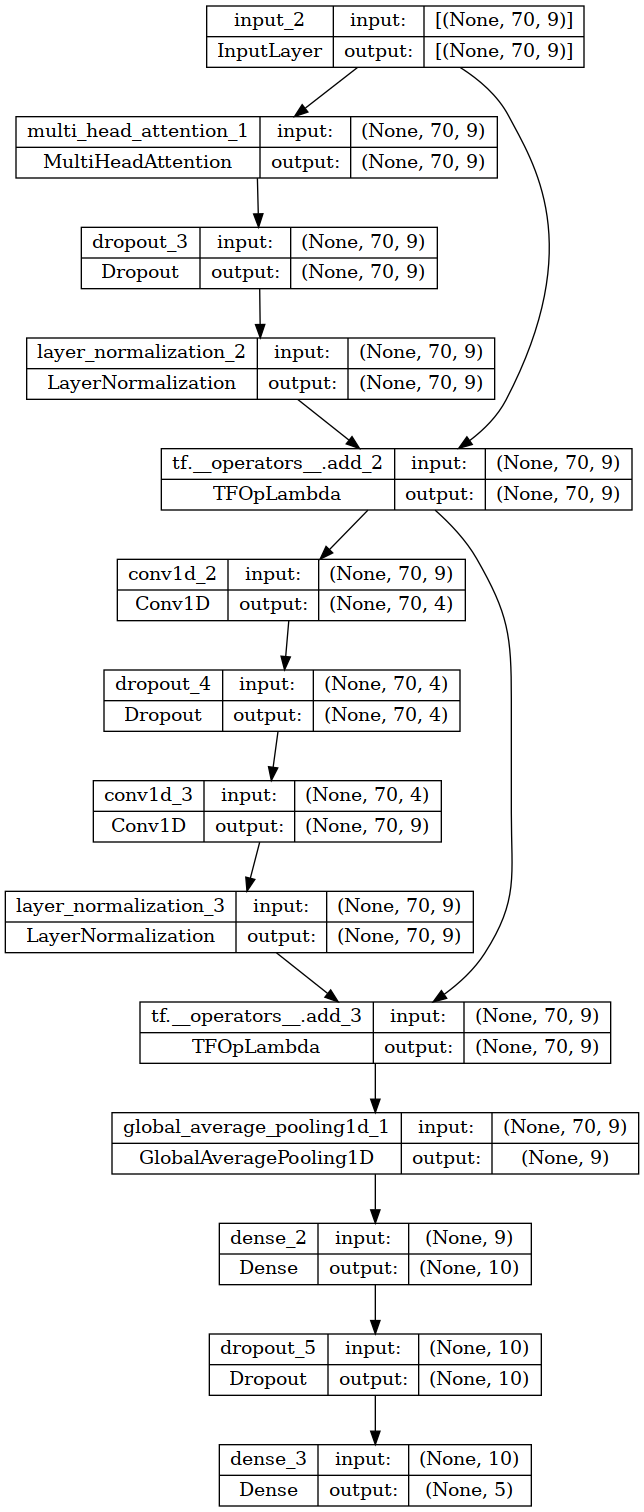

In [109]:
from keras.utils import plot_model
plot_model(model,show_shapes= True, show_layer_names= True, to_file='/home/RUS_CIP/st179677/project/model/Transformer.png')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


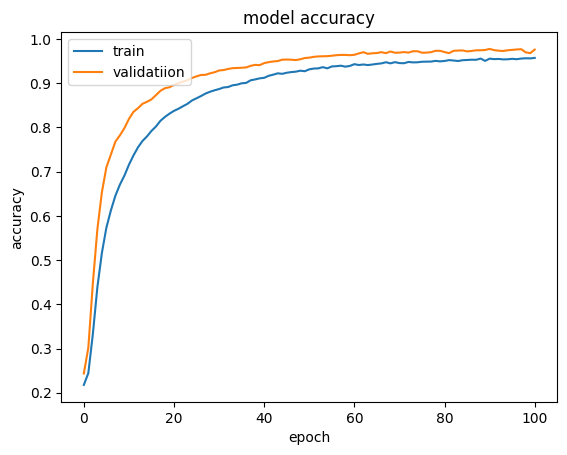

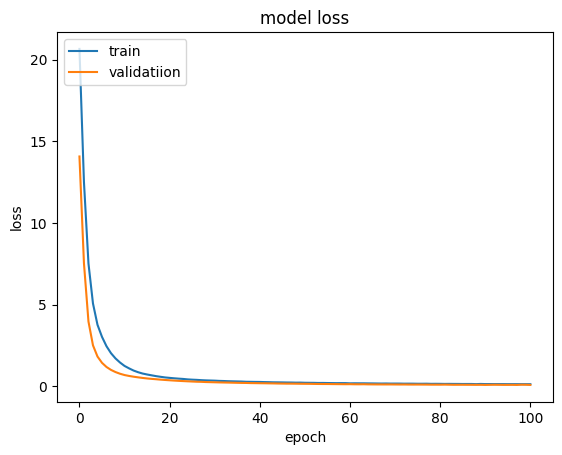

In [110]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validatiion'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validatiion'], loc='upper left')
plt.show()

In [111]:
#predicting on test datset
from keras.models import load_model
from sklearn.metrics import accuracy_score
# model = load_model(model_filepath)
classify_x=model.predict(X_test) 
# print(classify_x)
classes_x=np.argmax(classify_x,axis=1)
y_test= np.argmax(y_test,axis=1)
print(classes_x)
accuracy=accuracy_score(y_test, classes_x)
accuracy

317/317 [==============================] - 0s 694us/step
[0 0 0 ... 0 0 0]


0.8402722967640095

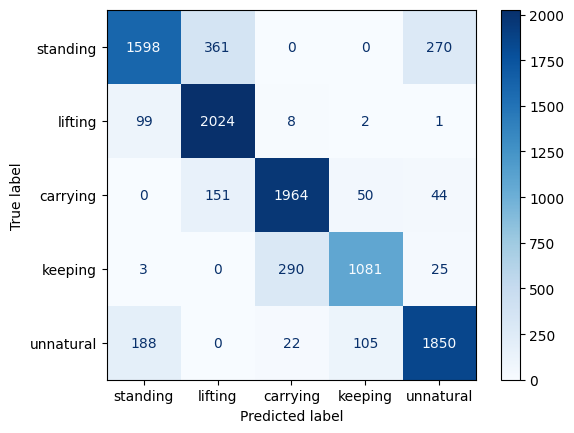

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      2229
           1       0.80      0.95      0.87      2134
           2       0.86      0.89      0.87      2209
           3       0.87      0.77      0.82      1399
           4       0.84      0.85      0.85      2165

    accuracy                           0.84     10136
   macro avg       0.84      0.84      0.84     10136
weighted avg       0.84      0.84      0.84     10136



In [112]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


labels = ["standing", "lifting", "carrying", "keeping", "unnatural"]

cm = confusion_matrix(y_test, classes_x)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, classes_x))

In [113]:
# model_filepath=f'/home/RUS_CIP/st179677/project/model/{round(accuracy*100,2)}_lstm_model.keras'

# model.save(model_filepath)